# Lab 1: Find the Frequency of a Sinusoidal Signal

## Goals:

In this lab, you will estimate the frequency of a sinusoidal signal very accurately. Specifically, you will learn that the *mean squared error* (MSE) criterion is very useful to estimate the parameters of a model for the signal from an observation of that signal. This is a very common and important task; the principles used in this lab are very useful.

In this lab, you will be given a few samples of a sinusoidal signal and then you will determine the frequency of that sinusoid from those samples.

In this lab, you will:

* practice your Python skills related to lists, mathematical operations, and plotting
* learn how to compute the MSE from a model and observations
* use the MSE criterion to estimate the frequency of the sinusoid

## This notebook is incomplete

In this notebook, there are multiple places for you to fill in either code or text.

You should do that directly in this notebook. 

Once you have completed all your work in this notebook, rerun the entire notebook using "Kernel > Restart and Run All" from the menubar. 

Fix any errors, then remove this cell (your notebook is now complete), and submit.

In [1]:
## import packages that we will need
%matplotlib inline
import matplotlib.pyplot as plt

import math

## Setting up

The signal and some functions that we will be using later in the lab are provided to you in the Python module `mse`; you're encouraged to look at the contents of the file `mse.py`. You will learn how to write functions like those in the module in a later lab; today you will simply use them.

In preparation for using the contents of this module, we must first import the relevant pieces:


In [2]:
from mse import TRUE_FREQ, tt, SIG, f_me, f_mse

### What just happened?

You told Python to load the enumerated items from the module `mse`. After this import, we can access the following:

* `TRUE_FREQ` this is the value we're trying to estimate; knowing this value allows us to see how close our estimates are
* `tt` is a list that defines our time grid
* `SIG` is a list that contains the sample values of our signal
* `f_me` and `f_mse` are functions that we'll use later


## Task 1: Rough Estimate

The cell below produces a plot of the observed signal `SIG` that we just imported.

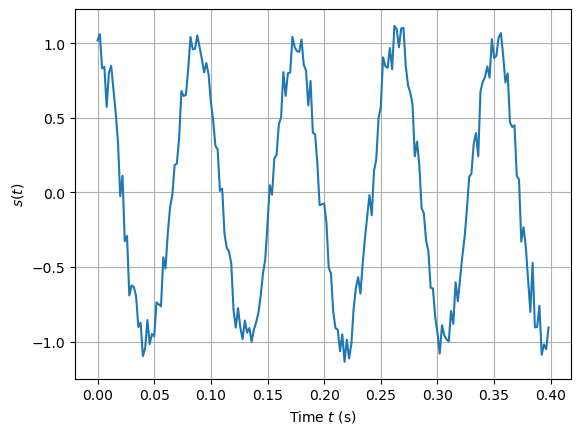

In [3]:
## plot the imported
plt.plot(tt, SIG)
plt.grid()
plt.xlabel('Time $t$ (s)')
plt.ylabel('$s(t)$')

plt.show()

This looks like a sinusoidal signal - it's just a little noisy. Signals are often corrupted by noise, especially when the signals are weak. We should always strive to process signals in such a manner that we can withstand noise.

#### Task: Rough frequency estimate

Look at the noisy sinusoid in the above plot and estimate its frequency $f$. It is probably best to estimate the length of a period $T$ and then take the inverse.

Store your estimate by assigning it to the variable `f_guess` in the next cell.

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #ffffcc; border-left: 6px solid #ffeb3b;">
Note: Your estimate doesn't need to be super accurate.
</p>

In [ ]:
f_guess = FILL_ME_IN

#### Task: Generate and plot a sinusoid with your guessed frequency

Now that you have an estimate (guess) of the frequency, we can construct a sinusoid of the guessed frequency and plot it together with the original signal. That allows us to visually compare how similar the two signals are.

Specifically, do the following in the cell below:
* use a list comprehension to construct a sinusoidal signal over the time grid `tt` (imported above); this sinusoid has amplitude 1, phase 0, and frequency equal to your guess.
  + name the list to store these samples `sig_guess`
  + Hint: the loop part of the list comprehension should be `for t in tt`.
* Plot both the original signal `SIG` and the generated signal `sig_guess` in the same plot. Simply, use two `plt.plot()` commands.

In [ ]:
## construct a sinusoid with frequency f_guess
sig_guess = [FILL_ME_IN] 

## plot both sinusoids
# plot the observed signal (see above)
# plot the signal sig_guess

plt.grid()
plt.xlabel('Time $t$ (s)')
plt.ylabel('$s(t)$')

plt.show()

Depending on how well you guessed the frequency, the two signals may or may not be very close.

Feel free to go back and change your guess and see how that changes the above plot. Remember that you have to *execute* ("Shift Return") all cells that are affected by your change.

Again, it is not very important to get a super accurate estimate of frequency at this time.

## Measuring Similarity

Let's take a step back and think about the problem a little more generally.

We have:
* **Observations** in the form of a list containing samples of a signal
* A **Model** for these observations; specifically we know that the samples are of the form
$$
    s(t) = \cos(2\pi f t) + \text{ noise}
$$
for $t$ in the the grid `tt`.

The only thing we don't know (besides the noise) is the frequency $f$. We say that $f$ is a **parameter** of the model.

What we would like to have is a way to measure how well the model fits the observations for a given value of $f$. We can then evaluate that **metric** for different values of $f$ and select the one that's best according to our metric.

A good metric
* is a function of the the parameter,
* for each parameter value, the metric is a scalar,
* has a *distinct* value for the true value of the parameter (e.g., a maximum occurs at the true parameter)

Let's construct such a metric.

### Attempt 1: Mean Error

We want to measure how different the observed signal is from a signal generated according to our model with some frequency $f$.

The word "different" suggests that we consider the difference between the two signals.

Let's try the following:
* use a list comprehension to compute the differences between the samples of the two signals (i.e., `SIG` and `sig_guess`]
  + Note: to compute the difference between signals, compute a list containing the difference between pairs of samples
  + store the result in the list `err`
* compute the *mean error* by summing over the elements of `err` and dividing by the length of `err`
  + use the functions `sum()` and `len()` on the list `err` for that purpose
  + print the value of the mean error
* plot the error signal `err` over the time grid `tt`.

In [ ]:
## compute the error signal
err = [SIG[n] - sig_guess[n] for n in range(len(SIG))]

## compute the mean error
mean_error = sum(err) / len(err)
print(f"The mean error for frequency {f_guess} is {mean_error}")

# the following line checks that your mean_error is correct
# LEAVE THIS LINE UNCHANGED
assert abs(mean_error - f_me(f_guess)) < 1e-8, "Your mean error is not correct"

## plot the error signal
plt.plot(tt, err )
plt.grid()
plt.xlabel('Time $t$ (s)')
plt.ylabel('$e(t)$')

plt.show()

## Mean Error as a function of $f$

So, we have a numerical value now for the mean error. Is that a useful metric?

To answer that question, we need to look at the mean error for other frequencies.

The function `f_me(f)` (imported above) computes the mean error for a given frequency `f`. We use that function to compute and plot the mean error over a wide range of frequencies. The cell below does that.

In [ ]:
## compute mean error over frequency
# make a frequency grid: 1000 values between 0 and 20
freqs = [n/50 for n in range(1000)]
ME_vals = [f_me(f) for f in freqs]

# plot
plt.plot(freqs, ME_vals, label="mean error")
plt.plot(TRUE_FREQ, f_me(TRUE_FREQ), 'ro', label="True")            # mark the true frequency
plt.plot(f_guess, f_me(f_guess), 'bd', label='Guess') # and the guess
plt.grid()

plt.xlabel('Frequency $f$')
plt.ylabel('Mean Error')
plt.legend()

plt.show()

### Question: Is the Mean Error function useful?

Looking at the above plot, there is nothing very *distinct* about the mean error function at the true frequency, i.e., where the red dot is.

The only remarkable feature is that the mean error is (close to) zero at the true frequency. Why does have to be true?

However, there are many other frequencies where the mean error is zero as well. And, there is nothing that would allow us to distinguish the zero at the true frequency from any of the other zeros.

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #ffdddd; border-left: 6px solid #f44336;">
    <strong>Conclusion:</strong> the mean error is not a useful metric for estimating the frequency.
</p>

### Attempt 2: Mean Squared Error

Where do those "false" zeros in the mean error come from?

A little thought suggests that the problem is related to the fact that the error signal $e(t)$ takes both positive and negative values. These positive and negative values can then cancel out when the average is computed, producing the false zeros.

Our second attempt eliminates the possibility of these cancellations by considering the square of the errors, i.e., the difference between samples is squared, *before* the average is computed.

The average over the squared errors is called the **mean squared error** (MSE)

<p style="margin-bottom: 15px; padding: 4px 12px; background-color: #ffffcc; border-left: 6px solid #ffeb3b;">
Note: we could have taken the absolute value instead of the square. But, the square is more tractable as it has a simple derivative.
</p>

#### Task: Compute and plot the squared error

The cell below contains a copy of the code we used to compute the mean error.

Modify the code above (for computing mean error) to compute:
* the squared error between `SIG` and `sig_guess (store as `err_sq`)
* the average of the squared error (store as `mean_sq_error`)
* plot the squared error signal (i.e., plot `err_sq` over `tt`)

In [ ]:
## compute the squared error signal
err_sq = [FILL_ME_IN]

## compute the mean squared error
mean_sq_error = FILL_ME_IN
print(f"The mean squared error for frequency {f_guess} is {mean_sq_error}")

# the following line checks that mean_error is correct
# LEAVE THIS LINE UNCHANGED
assert abs(mean_sq_error - f_mse(f_guess)) < 1e-8, "Your mean squared error is not correct"

## plot the squared error signal
# plot err_sq vs tt       

plt.grid()
plt.xlabel('Time $t$ (s)')
plt.ylabel('$|e(t)|^2$')

plt.show()

Note that the squared error $|e(t)|^2$ is never negative. Hence, cancellations do not occur when taking the average.

### Plot of MSE

The imported function `f_mse` computes the MSE at a given frequency, we use it to plot the MSE as a function of frequency.

Modify the code above (for mean error) to plot the MSE as a function of frequency. Mark the MSE of the true frequency and the guessed frequency as well.

In [ ]:
freqs = [n/50 for n in range(1000)]
MSE_vals = [FILL_ME_IN]

# three plot commands go here

plt.xlabel('Frequency $f$')
plt.ylabel('MSE')
plt.legend()

plt.grid()

plt.show()

### Task: How to use the MSE

In the cell below, explain:
* is the MSE a good metric?
* why the MSE is well suited to determine the frequency of the sinusoid?, and
* how you can determine/estimate the frequency $f$ from the MSE?

**Replace me with your explanation**

### Task: Estimate the frequency $f$

Based on how you propose to estimate the frequency $f$ from the MSE, implement a procedure to come up with a good estimate. Your procedure, can use the lists `freqs` and `MSE_vals` that we computed above and/or the function `f_mse` that computes the MSE at a given frequency.

Store your estimated frequency as `f_est`. Then make a plot that shows both:
* the observed signal (`SIG`)
* a sinusoid with the frequency `f_est`

In [ ]:
## Estimate frequency
        
f_est = FILL_ME_IN

print(f"min MSE occurs at f = {f_est}")

In [ ]:
## plot the observed signal and the sinusoid with estimated frequency
# construct a sinusoid with frequency f_guess
sig_est = [FILL_ME_IN]

# plot both sinusoids
plt.plot(tt, SIG)
plt.plot(tt, sig_est, 'r--')

plt.grid()
plt.xlabel('Time $t$ (s)')
plt.ylabel('$s(t)$')

plt.show()

## Submission

After you completed all tasks in this notebook, show your notebook to the TA.

Then upload your notebook on Blackboard.